In [1]:
# import basic libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import scipy.stats as stats
from warnings import filterwarnings

# import data reader
from pandas_datareader import data, wb
import pandas_datareader.data as web

# import time stamps library
from datetime import datetime

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# give white grid bacground
sns.set_style('whitegrid')

In [2]:
# set the starting date (1 January 2019) and ending date (31 December 2019) of the analysis
end = datetime(year = 2019, month = 12, day = 31)

start = datetime(end.year, month = 1, day = 1)

In [3]:
# fetching the data from yahoo
globals()['MSFT'] = web.DataReader('MSFT', 'yahoo', start, end)

In [4]:
# description of Apple stock
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,131.116996,129.189763,130.224230,130.268142,2.461674e+07,128.401116
std,15.007349,15.024365,15.076573,14.980826,7.705994e+06,15.279697
min,100.190002,97.199997,99.550003,97.400002,8.989200e+06,95.223351
25%,119.589996,118.379997,119.059998,119.279999,1.841280e+07,117.112396
50%,135.929993,133.570007,134.949997,135.160004,2.375060e+07,133.195053
75%,140.360001,138.250000,139.660004,139.139999,2.843710e+07,137.534241
max,159.550003,158.220001,159.449997,158.960007,5.563640e+07,157.705505


In [5]:
# column information of Apple stock
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-12-31 to 2019-12-31
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


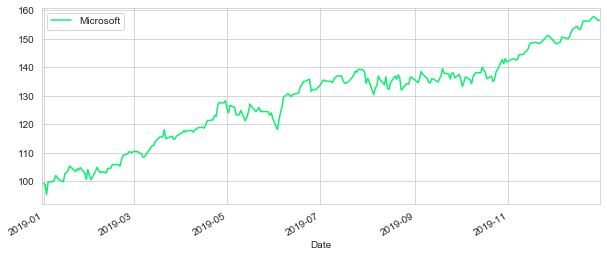

In [6]:
# plot of adjusted close price of Apple
MSFT['Adj Close'].plot(legend = True, figsize = (10, 4), label = 'Microsoft', color = '#08F26E')

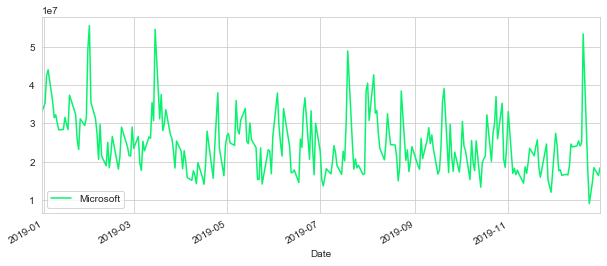

In [7]:
# plot of volume traded in Apple
MSFT['Volume'].plot(legend = True, figsize = (10, 4), label = 'Microsoft', color = '#08F26E')

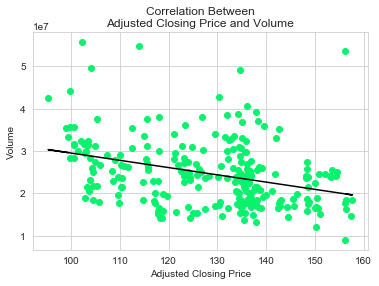

In [8]:
# scatterplot
plt.scatter(x = MSFT['Adj Close'], y = MSFT['Volume'], color = '#08F26E')

# labeling
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Volume')
plt.title('Correlation Between\nAdjusted Closing Price and Volume')

# trendline
adj_vol_fit = np.polyfit(MSFT['Adj Close'], MSFT['Volume'], 1)
adj_vol_polinom = np.poly1d(adj_vol_fit)
plt.plot(MSFT['Adj Close'], adj_vol_polinom(MSFT['Adj Close']), 'k-')

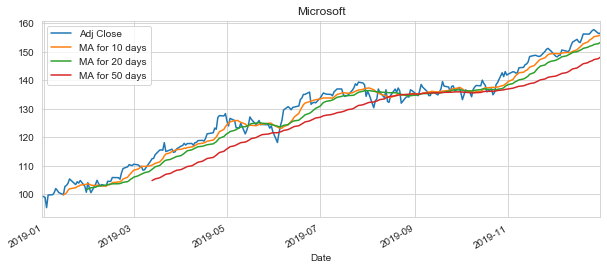

In [9]:
# calculating moving average
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    MSFT[column_name] = DataFrame.rolling(MSFT['Adj Close'], ma).mean()
    
# plot the moving average
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10, 4), title = 'Microsoft')

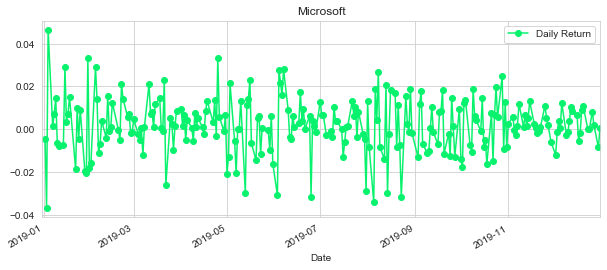

In [10]:
# creating percentage change
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()

# plotting the daily return stock in percentage change
MSFT[['Daily Return']].plot(
    subplots = False, 
    figsize = (10, 4), 
    legend = True, 
    linestyle = '-', 
    marker = 'o', 
    color = '#08F26E',
    title = 'Microsoft'
)

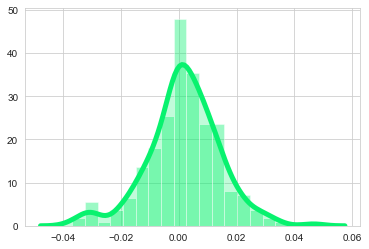

In [11]:
# plotting the daily return stock on average
sns.distplot(
    MSFT[['Daily Return']].dropna(), 
    hist = True,
    kde = True,
    kde_kws = {'linewidth': 5,
               'shade': True
              }, 
    color = '#08F26E',
    label = 'Microsoft'
)

In [12]:
# getting only the daily return in each technology corporation list
closing = web.DataReader('MSFT', 'yahoo', start, end)['Adj Close'].to_frame()
closing.head()

,Adj Close
Date,
2018-12-31,99.300156
2019-01-02,98.860214
2019-01-03,95.223351
2019-01-04,99.652115
2019-01-07,99.779205


In [13]:
# identifying the percentage change in daily returns
tech_returns = closing.pct_change()
tech_returns.head()

,Adj Close
Date,
2018-12-31,NaN
2019-01-02,-0.004430
2019-01-03,-0.036788
2019-01-04,0.046509
2019-01-07,0.001275


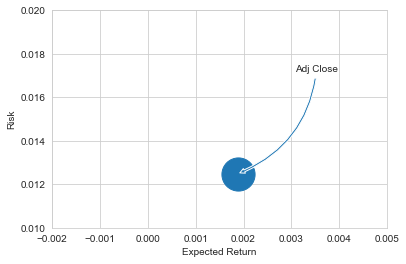

In [14]:
# drop NaN value from return columns
rets = tech_returns.dropna()

# set the size of points
area = np.pi*350

# scatter plot and labeling
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.xlim(-0.002, 0.005)
plt.ylim(0.010, 0.020)

# annotation
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), 
        xytext = (100, 100), 
        textcoords = 'offset points', 
        ha = 'right',
        va = 'bottom',
        arrowprops = dict(
            arrowstyle = 'simple',
            connectionstyle = 'arc3, rad = -0.3'
        )
    )

In [15]:
rets.head()

,Adj Close
Date,
2019-01-02,-0.004430
2019-01-03,-0.036788
2019-01-04,0.046509
2019-01-07,0.001275
2019-01-08,0.007251


In [16]:
# applying bootstrap method 
MSFT_rets = rets.quantile(0.05)
print('95% of the times of simulations, the worst daily loss in investing on Microsoft would not exceed {:.3f}%'.format(100 * abs(MSFT_rets['Adj Close'])))

95% of the times of simulations, the worst daily loss in investing on Microsoft would not exceed 1.914%


Text(0.5, 1.0, 'Monte-Carlo Simulation for Microsoft')

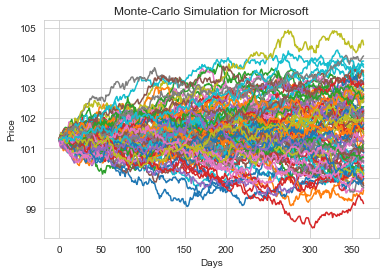

In [17]:
# setting up the necessary initial variables
days = 365
dt = 1 / days

MSFT_mu = rets.mean()
MSFT_sigma = rets.std()

# running Monte-Carlo simulation
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu * dt, 
                                    scale = sigma * np.sqrt(dt)
                                   )
        drift[x] = mu * dt
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
    return price

# 100 simulations for Apple
MSFT_start_price = MSFT['Open'][0]

for run in range(100):
    MSFT_simulation = stock_monte_carlo(MSFT_start_price, days, MSFT_mu, MSFT_sigma)
    plt.plot(MSFT_simulation)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte-Carlo Simulation for Microsoft')

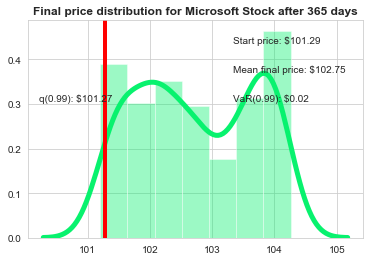

In [18]:
q = np.percentile(MSFT_simulation, 1)
sns.distplot(
    MSFT_simulation, 
    kde_kws = {'linewidth': 5}, 
    color = '#08F26E')

# starting price
plt.figtext(0.6, 0.8,s="Start price: $%.2f" %MSFT_start_price)
# mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % MSFT_simulation.mean())

# variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (MSFT_start_price - q,))

# display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# title
plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');